# 1. Import dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
%cd '/content/drive/MyDrive/MLProjects/TrafficSign' 

/content/drive/MyDrive/MLProjects/TrafficSign


In [3]:
pwd

'/content/drive/MyDrive/MLProjects/TrafficSign'

In [4]:
import pickle

In [5]:
with open('./data/train.p','rb') as data:
  train_data=pickle.load(data)
with open('./data/test.p','rb') as data:
  test_data=pickle.load(data)
with open('./data/valid.p','rb') as data:
  valid_data=pickle.load(data)

In [6]:
Xtrain=train_data['features']
Xtest=test_data['features']
Xvalid=valid_data['features']

In [7]:
ytrain=train_data['labels']
ytest=test_data['labels']
yvalid=valid_data['labels']

In [8]:
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape,Xvalid.shape,yvalid.shape

((34799, 32, 32, 3),
 (34799,),
 (12630, 32, 32, 3),
 (12630,),
 (4410, 32, 32, 3),
 (4410,))

# **2. Data Preprocessing**

In [9]:
import matplotlib.pyplot as plt

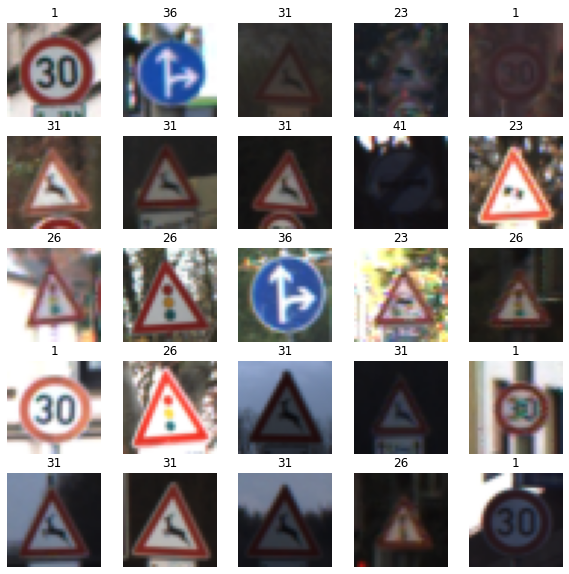

In [10]:

fig,axes=plt.subplots(5,5,figsize=(10,10))
axes=axes.ravel()
for i in np.arange(0,25):
  index=np.random.randint(3000)
  axes[i].imshow(Xtrain[index])
  axes[i].axis('off')
  axes[i].set_title(ytrain[index])

In [11]:
Xtrain=Xtrain.astype('float32')
Xtest=Xtest.astype('float32')
Xvalid=Xvalid.astype('float32')

In [12]:
Xtrain/=255.
Xtest/=255.
Xvalid/=255.

In [13]:
Xtrain[1]

array([[[0.10980392, 0.09411765, 0.09411765],
        [0.10196079, 0.09019608, 0.09019608],
        [0.10588235, 0.09411765, 0.09411765],
        ...,
        [0.12156863, 0.10980392, 0.10196079],
        [0.12156863, 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235]],

       [[0.10588235, 0.09411765, 0.09411765],
        [0.10588235, 0.09411765, 0.09411765],
        [0.10980392, 0.09803922, 0.09411765],
        ...,
        [0.12156863, 0.10588235, 0.09803922],
        [0.12156863, 0.10588235, 0.10196079],
        [0.12941177, 0.11372549, 0.10588235]],

       [[0.10196079, 0.09411765, 0.09411765],
        [0.10196079, 0.09411765, 0.09411765],
        [0.10588235, 0.09411765, 0.09019608],
        ...,
        [0.12156863, 0.10196079, 0.09803922],
        [0.12156863, 0.10588235, 0.10196079],
        [0.12941177, 0.11372549, 0.10588235]],

       ...,

       [[0.10980392, 0.09803922, 0.09019608],
        [0.11764706, 0.10588235, 0.09411765],
        [0.11764706, 0

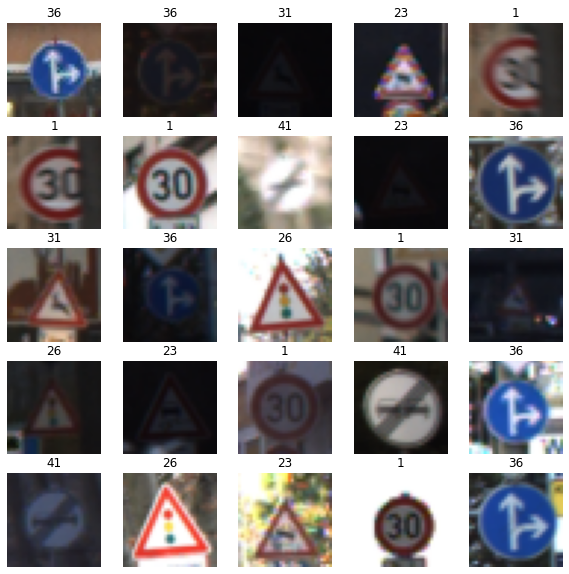

In [14]:
fig,axes=plt.subplots(5,5,figsize=(10,10))
axes=axes.ravel()
for i in np.arange(0,25):
  index=np.random.randint(3000)
  axes[i].imshow(Xtrain[index].squeeze())
  axes[i].axis('off')
  axes[i].set_title(ytrain[index])

In [15]:
X_train=np.mean(Xtrain,axis=3)
X_test=np.mean(Xtest,axis=3)
X_valid=np.mean(Xvalid,axis=3)

In [16]:
X_train=np.expand_dims(X_train,axis=3)
X_test=np.expand_dims(X_test,axis=3)
X_valid=np.expand_dims(X_valid,axis=3)

In [17]:
X_train.shape

(34799, 32, 32, 1)

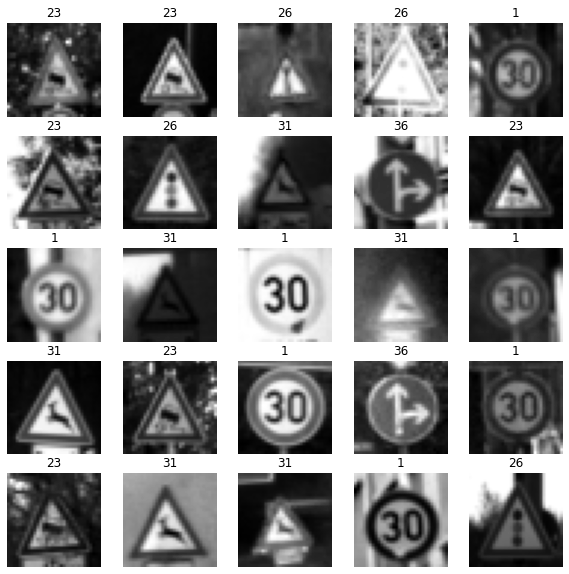

In [18]:
fig,axes=plt.subplots(5,5,figsize=(10,10))
axes=axes.ravel()
for i in np.arange(0,25):
  index=np.random.randint(3000)
  axes[i].imshow(X_train[index].squeeze(),cmap='gray')
  axes[i].axis('off')
  axes[i].set_title(ytrain[index])

In [19]:
import tensorflow 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,AveragePooling2D

In [21]:
model=Sequential()
model.add(Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),input_shape=(32,32,1),activation='relu'))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(43,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [23]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
hist=model.fit(X_train,ytrain,batch_size=32,epochs=15,validation_data=(X_valid,yvalid),shuffle=True)

Epoch 1/15
1088/1088 [==============================] - 24s 21ms/step - loss: 1.3807 - accuracy: 0.6215 - val_loss: 0.7227 - val_accuracy: 0.8075
Epoch 2/15
1088/1088 [==============================] - 23s 21ms/step - loss: 0.3930 - accuracy: 0.8930 - val_loss: 0.6191 - val_accuracy: 0.8417
Epoch 3/15
1088/1088 [==============================] - 23s 21ms/step - loss: 0.2380 - accuracy: 0.9367 - val_loss: 0.4828 - val_accuracy: 0.8741
Epoch 4/15
1088/1088 [==============================] - 23s 21ms/step - loss: 0.1643 - accuracy: 0.9568 - val_loss: 0.4448 - val_accuracy: 0.8834
Epoch 5/15
1088/1088 [==============================] - 23s 21ms/step - loss: 0.1229 - accuracy: 0.9678 - val_loss: 0.3664 - val_accuracy: 0.9063
Epoch 6/15
1088/1088 [==============================] - 23s 21ms/step - loss: 0.0955 - accuracy: 0.9748 - val_loss: 0.3696 - val_accuracy: 0.8959
Epoch 7/15
1088/1088 [==============================] - 23s 21ms/step - loss: 0.0735 - accuracy: 0.9795 - val_loss: 0.4044 -

In [25]:
model.evaluate(X_test,ytest)

395/395 [==============================] - 4s 10ms/step - loss: 0.7346 - accuracy: 0.8981


[0.7345828413963318, 0.8980997800827026]

In [27]:
model.save('/content/drive/MyDrive/MLProjects/TrafficSign/traffic_model.h5')